In [1]:
import os
import pandas as pd
import numpy as np
import networkx as nx
from analyze import NetworkAnalysis

In [2]:
path = os.getcwd()
df = pd.read_csv(path+'\\data\\data_example.csv')
df = df.drop(df.columns[0],axis=1)
df.head(5)

,block_timestamp,from_address,to_address,value,from_address_type,to_address_type
0,2021-09-24 01:01:04 UTC,0x1c26d94a07b820b759581792a2eaff2fde3d250f,0x018d5c4783f5317815f6e8168942a12adde3cd3c,0.000000,EOA,Contract
1,2021-09-24 03:38:42 UTC,0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740,0x893e228cecb7a39645ab9ab2966b71e7d8d94cef,0.067538,EOA,EOA
2,2021-09-24 04:37:14 UTC,0x14631c27771e7021fe4093a67b9a90353d64e951,0x07a13eea351d501cfedf96bda8528bbc71ca5d80,0.050000,EOA,Contract
3,2021-09-24 06:34:41 UTC,0xd5a06ac60905636f8c66f8ea1c662a1bfa2af9d1,0x0ee0cb563a52ae1170ac34fbb94c50e89adde4bd,0.000000,EOA,Contract
4,2021-09-24 09:23:45 UTC,0x6e551048cb8f6f94632206a25628807d76432126,0x0000000089341e263b85d84a0eea39f47c37a9d2,0.000000,EOA,Contract


In [3]:
userSpace = df[(df.from_address_type == 'EOA') & (df.to_address_type == 'EOA')]
contractSpace = df[(df.from_address_type == 'Contract') & (df.to_address_type == 'Contract')]
bipartiteSpace = df[((df.from_address_type == 'EOA') & (df.to_address_type == 'Contract')) | ((df.from_address_type == 'Contract') & (df.to_address_type == 'EOA'))]

In [4]:
userSpace = userSpace[['from_address','to_address','value']]
userSpace.head()

,from_address,to_address,value
1,0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740,0x893e228cecb7a39645ab9ab2966b71e7d8d94cef,0.067538
5,0x50e7b0f8b2811a7877191c3d2be56bc191772601,0x8951f25adcc7c3256dd9b521ed726fb587a46d52,0.048131
7,0x8fa6521bd55c981b27cc7dae33754dee86125e0a,0x510e8fdfdfe54907065ab4478d1ddb8495e42ec2,0.013084
16,0xc098b2a3aa256d2140208c3de6543aaef5cd3a94,0x6139fbb2f9ff42eee1dd32c690eca07fe07644b5,0.025541
23,0x99f743d9e1db6bd9ac6cb27e4ae2d40cfe6de1cb,0x4f6742badb049791cd9a37ea913f2bac38d01279,2.044882


In [61]:
G = nx.from_pandas_edgelist(userSpace,                # the df containing the data
                            source='from_address',        # first element of the dyad
                            target='to_address',        # second element of the dyad
                            edge_attr='value')# weight

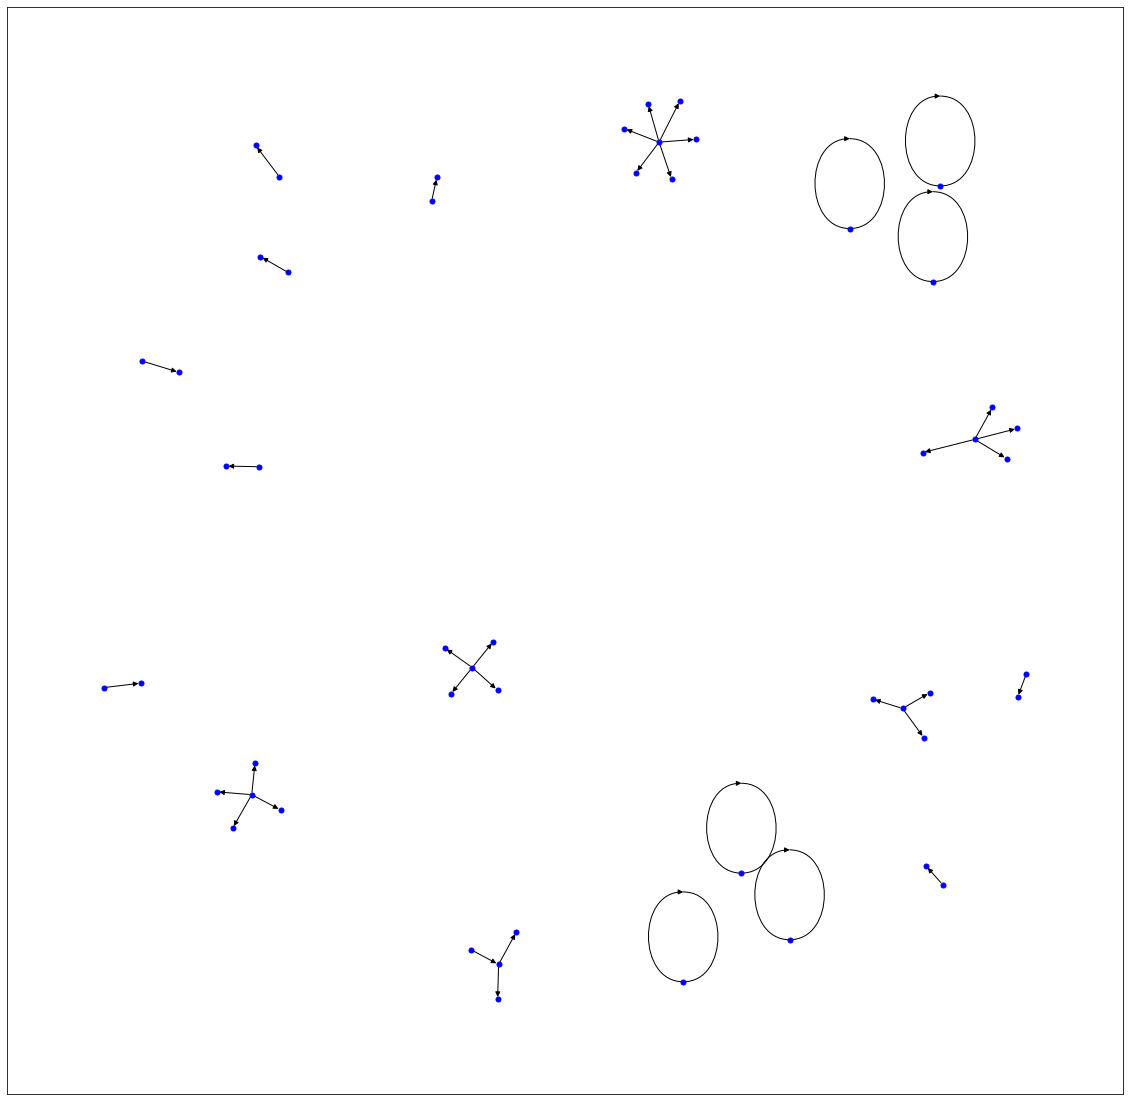

In [5]:
classObj = NetworkAnalysis(userSpace)
classObj.plot_network(classObj.gen_network())

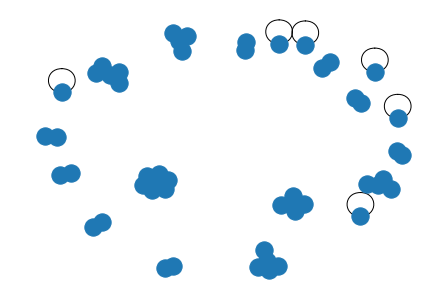

In [64]:
nx.draw(G)